In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue
        if line.strip()=="":continue
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)]",line)[0]
#         print(x_y)
        x_y = tuple(map(float,x_y))#字符串转化成数组
        city_location[city] = x_y
    return city_location

In [4]:
city_info = get_city_info(coordination_source)

In [5]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [6]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [7]:
import math

In [8]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [9]:
get_city_distance("上海","北京")

727.52769688981

# 绘图

In [10]:
import networkx as nx
from matplotlib.font_manager import _rebuild
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [11]:
city_info.keys()


dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [12]:
city_graph = nx.Graph()

In [13]:
city_graph.add_nodes_from(list(city_info.keys()))

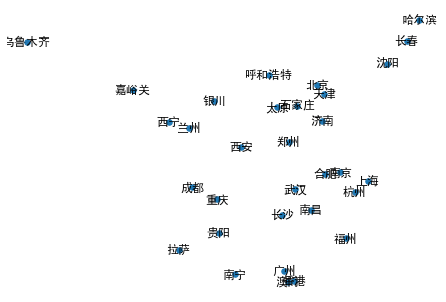

In [14]:
nx.draw(city_graph,city_info,with_labels = True,node_size =30)

In [35]:
threshold = 700

In [36]:
from collections import defaultdict

In [37]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [38]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [39]:
def bfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
            if city== destination:
                return new_path
        visited.add(froniter)

In [40]:
bfs(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [41]:
bfs(cities_connection,"拉萨","西安")

['拉萨', '兰州', '西安']

In [42]:
def dfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes = [new_path]+pathes
            if city== destination:
                return new_path
        visited.add(froniter)

In [43]:
dfs(cities_connection,"上海","香港")

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

In [44]:
dfs(cities_connection,"拉萨","西安")

['拉萨', '银川', '西安']

In [45]:
dfs(cities_connection,"拉萨","北京")

['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京']

In [48]:
dfs(cities_connection,"北京","拉萨")

['北京', '呼和浩特', '银川', '拉萨']

In [47]:
city_graph

In [63]:
def bfs2(graph,start,destination,search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successors = graph[froniter]
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes = pathes+[new_path]
        pathes = search_strategy(pathes)
        if pathes and pathes[0][-1]== destination:
            return pathes[0]


In [64]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [65]:
get_distance_of_path(['北京', '呼和浩特', '银川', '拉萨'])

1680.9725619035294

In [71]:
def sorted_by_distance(pathes):
    return sorted(pathes,key=get_distance_of_path)

In [72]:
bfs2(cities_connection,"上海","香港",search_strategy=sorted_by_distance)

['上海', '福州', '香港']

In [73]:
bfs(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [74]:
bfs2(cities_connection,"北京","上海",search_strategy=sorted_by_distance)

['北京', '天津', '上海']

In [75]:
bfs(cities_connection,"北京","上海")

['北京', '济南', '上海']

In [15]:
import matplotlib

In [16]:
matplotlib.matplotlib_fname()

'/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'